<a href="https://colab.research.google.com/github/SourabhThanvi/Pw_Skills_Sourabh/blob/main/Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score, cohen_kappa_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler

## Q1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy?

In [110]:
df1 = sns.load_dataset('iris')

In [111]:
encoder = OneHotEncoder(sparse_output=False, drop = 'first')

species_encoded = encoder.fit_transform(df1[['species']])

species_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['species']))
df = pd.concat([df1.drop('species', axis=1), species_df], axis=1)

In [112]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 5)
(45, 5)
(105,)
(45,)


In [7]:
lr = LogisticRegression(penalty=None ,multi_class='multinomial')
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', penalty=None)

In [8]:
# Train Accuracy
y_actual = lr.predict(X_train)
f1_score(y_train, y_actual)

1.0

In [9]:
accuracy_score(y_train, y_actual)

1.0

In [10]:
y_pred = lr.predict(X_test)

In [11]:
# test Accuracy
f1_score(y_test, y_pred)

1.0

In [12]:
accuracy_score(y_test, y_pred)

1.0

## Q2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy?

In [13]:
lr2 = LogisticRegression(penalty='l1', solver='liblinear')
lr2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [14]:
y_pred2 = lr2.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred2)

1.0

## Q3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients?

In [16]:
lr3 = LogisticRegression(penalty='l2')
lr3.fit(X_train, y_train)

LogisticRegression()

In [17]:
lr3.coef_

array([[-0.06232434,  0.0305047 ,  1.82933081,  1.26372445, -2.43774275]])

In [18]:
y_pred3 = lr3.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred3)

1.0

## Q4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')?

In [20]:
lr4 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
lr4.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [21]:
y_pred4 = lr4.predict(X_test)
accuracy_score(y_test, y_pred3)

1.0

## Q5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr

In [22]:
from sklearn.datasets import make_classification

X5, y5 = make_classification(n_samples=500, n_features=10, n_classes=3, n_informative=5, n_redundant=2,class_sep=0.8, flip_y=0.1, random_state=42)

df5 = pd.DataFrame(X5, columns=[f'Feature_{i}' for i in range(10)])
df5['Target'] = y5

In [23]:
df5.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,1.877169,0.608229,1.406781,-1.074067,-0.241287,-0.372816,-1.387554,0.361416,-2.366124,-1.137279,1
1,-1.156701,0.200015,1.862746,0.074526,-2.520077,-0.407259,-0.821440,-0.725097,-1.191627,2.092836,0
2,0.985691,-1.154866,-0.113080,-1.654004,-1.731190,-0.084065,-1.753424,-0.963583,-2.510457,-0.864955,2
3,-0.353460,2.569907,-1.180284,-0.272010,-1.967050,1.184245,0.465190,0.263547,-0.632829,1.281973,0
4,-0.388313,-1.732544,-0.521401,-1.213626,-1.941814,1.815161,2.235120,1.142700,0.784729,1.066604,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.3, random_state=41)

In [61]:
lr5 = LogisticRegression(multi_class='ovr')
lr5.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [26]:
y_pred5 = lr5.predict(X_test)
accuracy_score(y_test, y_pred5)

0.5666666666666667

## Q6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy?

In [27]:
lr6 = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(lr6, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'C': 0.1, 'penalty': 'l2'}


In [28]:
y_pred = grid_search.best_estimator_.predict(X_test)

accuracy_score(y_test, y_pred)

0.5733333333333334

## Q7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy?

In [29]:
lr7 = LogisticRegression(solver='liblinear')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(lr7, X5, y5, cv=skf, scoring='accuracy')

print(cv_scores)
print(np.mean(cv_scores))

[0.53 0.6  0.64 0.63 0.56]
0.592


## Q8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

In [32]:
df8 = pd.read_csv('Iris.csv')

In [33]:
df8.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
encoder = OneHotEncoder(sparse_output=False, drop = 'first')

species_encoded = encoder.fit_transform(df8[['Species']])

species_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['Species']))
df8 = pd.concat([df8.drop('Species', axis=1), species_df], axis=1)

In [35]:
X_8 = df8.iloc[:, :-1]
y_8 = df8.iloc[:, -1]

In [36]:
X_train_8, X_test_8, y_train, y_test = train_test_split(X_8, y_8, test_size=0.3, random_state=42)

In [37]:
lr8 = LogisticRegression()
lr8.fit(X_train_8, y_train)

LogisticRegression()

In [38]:
y_pred = lr8.predict(X_test_8)
accuracy_score(y_test, y_pred)

1.0

## Q9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy?

In [49]:
lr9 = LogisticRegression(solver='liblinear')

param_distributions = {
    'C' : [0.01, 0.1, 1, 10],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'saga']
}
random_search = RandomizedSearchCV(lr9, param_distributions, cv=6, scoring='accuracy', n_iter=15, verbose=2)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(best_params)

Fitting 6 folds for each of 15 candidates, totalling 90 fits
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [50]:
y_pred = random_search.best_estimator_.predict(X_test)

## Q10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy?

In [51]:
ovo_clf = OneVsOneClassifier(LogisticRegression(max_iter=200))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=200))

In [52]:
y_pred = ovo_clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## Q11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification?

In [53]:
lr6

LogisticRegression(solver='liblinear')

In [55]:
# Confusion matric for lr6 model.
cm = confusion_matrix(y_test, y_pred)
cm

array([[29,  0],
       [ 0, 16]])

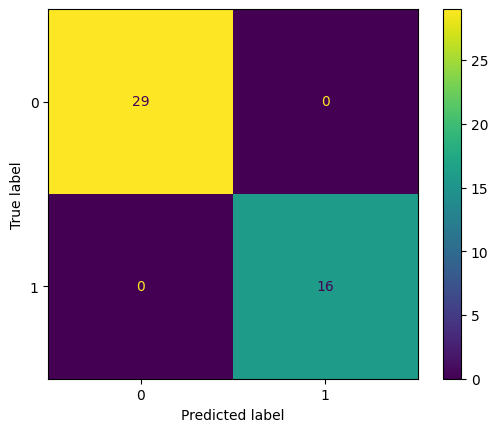

In [56]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [63]:
# lr5 confusion matrix
cm2 = confusion_matrix(y_test, y_pred5)

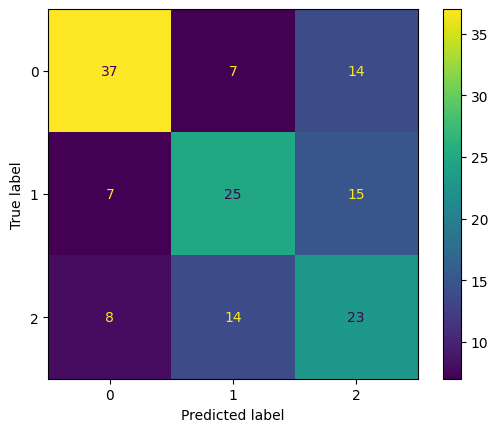

In [64]:
disp2 = ConfusionMatrixDisplay(cm2)
disp2.plot()

## Q12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score?

In [65]:
df12 = pd.read_csv('Iris.csv')

In [66]:
encoder = OneHotEncoder(sparse_output=False, drop = 'first')

species_encoded = encoder.fit_transform(df12[['Species']])

species_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['Species']))
df12 = pd.concat([df12.drop('Species', axis=1), species_df], axis=1)

In [67]:
x = df12.iloc[:, :-1]
y = df12.iloc[:, -1]

In [68]:
x_train_12, x_test_12, y_train_12, y_test_12 = train_test_split(x, y, test_size=0.25, random_state=42)

In [69]:
lr12 = LogisticRegression()

lr12.fit(x_train_12, y_train_12)

LogisticRegression()

In [70]:
y_pred_12 = lr12.predict(x_test_12)

In [71]:
f1 = f1_score(y_test_12, y_pred_12)
ps = precision_score(y_test_12, y_pred_12)
rs = recall_score(y_test_12, y_pred_12)

In [72]:
print(f'f1 score is {f1}')
print(f'precision score is {ps}')
print(f'recall score is {rs}')

f1 score is 1.0
precision score is 1.0
recall score is 1.0


## Q13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance?

In [73]:
X, y = make_classification(n_classes=3, n_clusters_per_class=1, weights=[0.05, 0.15, 0.8],
                           n_samples=1000, n_features=4, random_state=42)


df = pd.DataFrame(data=X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = y

In [74]:
df.sample(5)

,Feature_1,Feature_2,Feature_3,Feature_4,Target
358,-1.596094,1.182454,0.441903,1.349922,0
605,1.087576,-0.773439,-0.379963,-0.904518,2
207,-1.252971,1.510813,-1.075988,1.336122,2
633,-3.275823,3.558563,-1.857186,3.307525,2
554,-1.789284,1.985147,-1.115598,1.826255,2


In [75]:
df['Target'].value_counts()

,count
Target,
2,799
1,149
0,52


In [76]:
x_train_13, x_test_13, y_train_13, y_test_13 = train_test_split(X, y, test_size=0.25, random_state=42)

In [77]:
lr_13 = LogisticRegression(class_weight='balanced')
lr_13.fit(x_train_13, y_train_13)

LogisticRegression(class_weight='balanced')

In [78]:
y_pred_13 = lr_13.predict(x_test_13)

In [79]:
accuracy_score(y_test_13, y_pred_13)

0.94

## Q14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance?

In [80]:
titanic = pd.read_csv('Titanic-Dataset.csv')

In [81]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [82]:
titanic.shape

(891, 12)

In [83]:
titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [84]:
titanic.duplicated().sum()

0

In [85]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

<ipython-input-85-d4dc62d1860c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [86]:
titanic['Embarked'].fillna(titanic['Embarked'].mode(), inplace=True)

<ipython-input-86-06d68decaf3a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode(), inplace=True)


In [87]:
titanic.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [88]:
titanic.sample(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
747,1,2,female,30.0,0,0,13.0000,S
662,0,1,male,47.0,0,0,25.5875,S


In [89]:
encoder = OneHotEncoder(sparse_output=False, drop = 'first')

species_encoded = encoder.fit_transform(titanic[['Sex', 'Embarked']])

species_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))
titanic_cleaned = pd.concat([titanic.drop(['Sex', 'Embarked'], axis=1), species_df], axis=1)

In [90]:
titanic_cleaned.sample(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
112,0,3,22.0,0,0,8.05,1.0,0.0,1.0,0.0
792,0,3,28.0,8,2,69.55,0.0,0.0,1.0,0.0


In [91]:
titanic_cleaned.drop('Embarked_nan', axis=1, inplace=True)

In [116]:
x14 = titanic_cleaned.iloc[:, 1:]
y14 = titanic_cleaned.iloc[:, 0]

In [117]:
print(x14)
print(y14)

     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0         3  22.0      1      0   7.2500       1.0         0.0         1.0
1         1  38.0      1      0  71.2833       0.0         0.0         0.0
2         3  26.0      0      0   7.9250       0.0         0.0         1.0
3         1  35.0      1      0  53.1000       0.0         0.0         1.0
4         3  35.0      0      0   8.0500       1.0         0.0         1.0
..      ...   ...    ...    ...      ...       ...         ...         ...
886       2  27.0      0      0  13.0000       1.0         0.0         1.0
887       1  19.0      0      0  30.0000       0.0         0.0         1.0
888       3  28.0      1      2  23.4500       0.0         0.0         1.0
889       1  26.0      0      0  30.0000       1.0         0.0         0.0
890       3  32.0      0      0   7.7500       1.0         1.0         0.0

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888 

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x14, y14, test_size=0.25, random_state=42)

In [95]:
lr14 = LogisticRegression()
lr14.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
y_pred = lr14.predict(x_test)

In [97]:
accuracy_score(y_test, y_pred)

0.7982062780269058

## Q15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling?

### Without Scaling the titanic dataset

In [98]:
lr15 = LogisticRegression()
lr15.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
y_pred = lr15.predict(x_test)
accuracy_score(y_test, y_pred)

0.7982062780269058

### With Scaling

In [100]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [101]:
lr15_new = LogisticRegression()
lr15_new.fit(x_train_scaled, y_train)

LogisticRegression()

In [102]:
y_pred = lr15_new.predict(x_test_scaled)
accuracy_score(y_test, y_pred)

0.8071748878923767

In [103]:
# After scaling accuracy increased by a little margin

## Q16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

In [104]:
lr15_new = LogisticRegression()
lr15_new.fit(x_train_scaled, y_train)

y_pred = lr15_new.predict(x_test_scaled)

In [105]:
roc_auc_score(y_test, y_pred)

0.7942730169377831

## Q17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy

In [114]:
lr17 = LogisticRegression(C=0.5, solver='lbfgs', max_iter=1000, random_state=42)
lr17.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=1000, random_state=42)

In [115]:
y_pred = lr17.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## Q18. Write a Python program to train Logistic Regression and identify important features based on model coefficients

In [119]:
# Taking dataset of titanic
lr18 = LogisticRegression()
lr18.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
lr18.coef_

array([[-0.73123014, -0.03021745, -0.30406234, -0.2480399 ,  0.00652495,
        -2.57724845,  0.01738407, -0.13471185]])

In [121]:
titanic_cleaned.columns
# Embarked_Q and Fare Column have highest Coef value

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Q19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

In [123]:
y_pred = lr18.predict(x_test)

cohen_kappa_score(y_test, y_pred)

0.5720134772039067

## Q20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

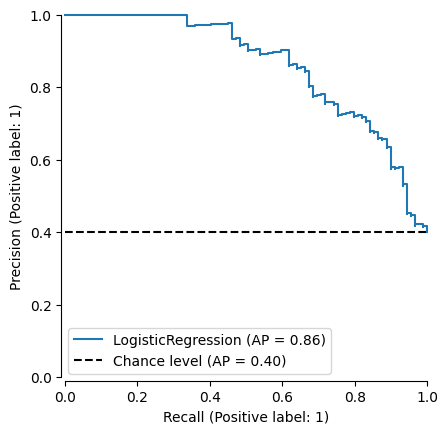

In [125]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(lr18, x_test, y_test, plot_chance_level=True, despine=True)


## Q21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy

In [128]:
lr20 = LogisticRegression()

grid_params = {'solver':['liblinear', 'saga', 'lbfgs']}
grid = GridSearchCV(lr20, param_grid=grid_params, cv=5, scoring='accuracy')

grid.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy')

In [129]:
grid.best_params_

{'solver': 'liblinear'}

In [130]:
grid.cv_results_

{'mean_fit_time': array([0.00970097, 0.01475687, 0.02353897]),
 'std_fit_time': array([0.00512303, 0.0003467 , 0.00118478]),
 'mean_score_time': array([0.00435586, 0.00288162, 0.00334387]),
 'std_score_time': array([0.00332207, 0.00023826, 0.00035026]),
 'param_solver': masked_array(data=['liblinear', 'saga', 'lbfgs'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'liblinear'}, {'solver': 'saga'}, {'solver': 'lbfgs'}],
 'split0_test_score': array([0.78358209, 0.68656716, 0.79850746]),
 'split1_test_score': array([0.85820896, 0.73880597, 0.8358209 ]),
 'split2_test_score': array([0.78358209, 0.62686567, 0.78358209]),
 'split3_test_score': array([0.73684211, 0.63909774, 0.7443609 ]),
 'split4_test_score': array([0.82706767, 0.68421053, 0.79699248]),
 'mean_test_score': array([0.79785658, 0.67510942, 0.79185277]),
 'std_test_score': array([0.04153549, 0.0397383 , 0.02942033]),
 'rank_test_score': array([1, 3, 2], dtype

## Q22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)

In [131]:
from sklearn.metrics import matthews_corrcoef

In [132]:
np.random.seed(42)
X = np.random.rand(200, 5)
y = np.random.randint(0, 2, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
lr22 = LogisticRegression()
lr22.fit(X_train, y_train)

LogisticRegression()

In [135]:
y_pred = lr22.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.3405405449736225

## Q23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling

In [136]:
# Already done in above question

## Q24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation

In [137]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
lr24 = LogisticRegression()

param_grid = {'C': np.logspace(-3, 3, 10)}

grid_search = GridSearchCV(lr24, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='accuracy')

In [139]:
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

final_model = LogisticRegression(C=best_C, solver='lbfgs', max_iter=1000, random_state=42)
final_model.fit(X_train, y_train)

LogisticRegression(C=0.004641588833612777, max_iter=1000, random_state=42)

In [140]:
print(f"Optimal C value: {best_C}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Optimal C value: 0.004641588833612777
Best Cross-Validation Accuracy: 0.6000


## Q25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

In [141]:
import joblib

In [144]:
model_filename = "logistic_regression_model.joblib"
joblib.dump(lr22, model_filename)
print(f"Model saved to {model_filename}")

Model saved to logistic_regression_model.joblib


In [145]:
loaded_model = joblib.load(model_filename)

In [146]:
new_data = np.random.rand(5, 5)
loaded_predictions = loaded_model.predict(new_data)

In [147]:
loaded_probabilities = loaded_model.predict_proba(new_data)
print(f"Probabilities from loaded model: {loaded_probabilities}")

Probabilities from loaded model: [[0.73976771 0.26023229]
 [0.65244822 0.34755178]
 [0.65664629 0.34335371]
 [0.60358112 0.39641888]
 [0.76148769 0.23851231]]
